# Proyek Analisis Data: Air Quality
- **Nama:** Mohamad Rafli Agung Subekti
- **Email:** raflisbk@gmail.com
- **ID Dicoding:** raflisbk

## Menentukan Pertanyaan Bisnis

- Bagaimana kualitas udara di distrik - distrik Beijing antara 2013-2017 berdasarkan parameter PM2.5, PM10, NO2, SO2, CO, dan O3?
- Apakah kualitas udara di distik - distik beijing membaik atau memburuk selama periode 2013-2017?

## Import Semua Packages/Library yang Digunakan

In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

## Data Wrangling

### Gathering Data

In [212]:
df_aotizhongxin= pd.read_csv("data/Aotizhongxin.csv")
df_aotizhongxin.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
17708,17709,2015,3,8,20,12.0,51.0,5.0,23.0,600.0,72.0,7.5,1022.3,-20.2,0.0,NNW,3.2,Aotizhongxin
9547,9548,2014,4,2,19,130.0,224.0,31.0,64.0,1100.0,87.0,15.9,1014.3,4.3,0.0,SSW,1.1,Aotizhongxin
9441,9442,2014,3,29,9,28.0,67.0,8.0,16.0,200.0,55.0,18.1,1009.7,3.2,0.0,NE,2.5,Aotizhongxin
34809,34810,2017,2,18,9,79.0,103.0,36.0,69.0,2000.0,2.0,-1.4,1022.3,-15.3,0.0,NW,1.1,Aotizhongxin
33018,33019,2016,12,5,18,9.0,26.0,4.0,28.0,400.0,58.0,3.3,1027.0,-20.2,0.0,ENE,1.7,Aotizhongxin


In [213]:
df_changping=pd.read_csv("data/Changping.csv")
df_changping.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
2928,2929,2013,7,1,0,230.0,149.0,2.856,38.8017,NaN,14.3514,24.3,992.7,23.4,0.2,E,0.4,Changping
9643,9644,2014,4,6,19,53.0,168.0,16.000,36.0000,600.0,103.0000,20.1,1004.2,-3.6,0.0,E,1.2,Changping
21917,21918,2015,8,31,5,21.0,21.0,2.000,15.0000,300.0,35.0000,20.1,1003.5,17.5,0.0,NW,0.2,Changping
18195,18196,2015,3,29,3,23.0,46.0,3.000,40.0000,400.0,40.0000,11.0,1007.5,-3.2,0.0,NNW,1.4,Changping
16302,16303,2015,1,9,6,9.0,12.0,3.000,16.0000,300.0,55.0000,0.0,1021.0,-17.7,0.0,NW,1.2,Changping


In [214]:
df_dingling = pd.read_csv("data/Dingling.csv")
df_dingling.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
24253,24254,2015,12,6,13,104.0,136.0,27.0,80.0,2100.0,13.0,4.2,1019.7,-5.6,0.0,NE,1.4,Dingling
21270,21271,2015,8,4,6,8.0,15.0,17.0,14.0,400.0,78.0,21.5,992.7,13.7,0.0,NNW,2.1,Dingling
1050,1051,2013,4,13,18,10.0,29.0,3.0,5.0,200.0,94.0,18.1,997.8,-5.2,0.0,N,6.0,Dingling
3821,3822,2013,8,7,5,22.0,9.0,3.0,2.0,500.0,60.0,24.0,994.0,22.3,0.0,NNW,0.6,Dingling
249,250,2013,3,11,9,107.0,141.0,31.0,54.0,1100.0,100.0,4.9,1013.7,-9.7,0.0,SSW,0.9,Dingling


In [215]:
df_dongsi=pd.read_csv("data/Dongsi.csv")
df_dongsi.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
18886,18887,2015,4,26,22,49.0,166.0,18.0,24.0,500.0,119.0,24.9,1003.8,9.6,0.0,SW,4.5,Dongsi
30501,30502,2016,8,22,21,47.0,51.0,2.0,41.0,700.0,111.0,30.1,1006.0,19.5,0.0,S,1.4,Dongsi
7705,7706,2014,1,16,1,598.0,598.0,141.0,140.0,6400.0,12.0,-3.1,1023.0,-6.7,0.0,NE,1.8,Dongsi
18343,18344,2015,4,4,7,40.0,54.0,7.0,32.0,500.0,66.0,9.7,1008.9,0.3,0.0,SW,1.8,Dongsi
27697,27698,2016,4,28,1,152.0,152.0,4.0,119.0,2000.0,2.0,12.2,1009.3,10.9,0.0,NE,0.7,Dongsi


In [216]:
df_guanyuan = pd.read_csv("data/Guanyuan.csv")
df_guanyuan.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
23507,23508,2015,11,5,11,103.0,103.0,2.0,51.0,900.0,12.0,9.3,1026.0,7.1,0.1,ENE,2.6,Guanyuan
34665,34666,2017,2,12,9,126.0,194.0,73.0,77.0,3500.0,17.0,-0.3,1024.5,-13.9,0.0,NE,1.2,Guanyuan
8850,8851,2014,3,4,18,8.0,24.0,3.0,29.0,400.0,61.0,5.4,1021.6,-21.8,0.0,NW,2.9,Guanyuan
8715,8716,2014,2,27,3,18.0,5.0,20.0,17.0,200.0,63.0,3.1,1021.6,-10.6,0.0,NE,3.2,Guanyuan
21034,21035,2015,7,25,10,110.0,110.0,5.0,43.0,1500.0,111.0,27.4,997.4,20.7,0.0,WSW,1.0,Guanyuan


In [217]:
df_gucheng = pd.read_csv("data/Gucheng.csv")
df_gucheng.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
12159,12160,2014,7,20,15,117.0,177.0,2.0,19.0,1200.0,188.0,34.2,994.4,26.1,0.0,S,3.0,Gucheng
26195,26196,2016,2,25,11,48.0,70.0,25.0,36.0,1200.0,39.0,3.4,1025.4,-16.4,0.0,S,2.1,Gucheng
10096,10097,2014,4,25,16,90.0,126.0,23.0,26.0,700.0,203.0,24.0,1007.0,5.3,0.0,NNW,1.3,Gucheng
22176,22177,2015,9,11,0,5.0,6.0,2.0,12.0,200.0,63.0,13.6,1011.7,11.6,0.0,NW,0.0,Gucheng
2332,2333,2013,6,6,4,201.0,212.0,3.0,62.0,2200.0,3.0,18.2,1003.1,17.2,0.0,SE,0.5,Gucheng


In [218]:
df_huairou=pd.read_csv("data/Huairou.csv")
df_huairou.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
9593,9594,2014,4,4,17,25.0,182.0,2.0,9.0,200.0,116.0,19.2,1003.9,-14.5,0.0,NNE,9.3,Huairou
29220,29221,2016,6,30,12,32.0,32.0,2.0,14.0,400.0,101.0,28.5,994.9,19.7,0.0,E,1.1,Huairou
13972,13973,2014,10,4,4,66.0,66.0,2.0,42.0,1400.0,8.0,13.9,1008.4,13.3,2.5,SSE,1.2,Huairou
33533,33534,2016,12,27,5,16.0,16.0,3.0,16.0,500.0,44.0,-8.4,1025.4,-16.8,0.0,NE,1.7,Huairou
10014,10015,2014,4,22,6,24.0,33.0,2.0,17.0,300.0,58.0,10.9,1007.1,0.0,0.0,SE,0.7,Huairou


In [219]:
df_nogzhanguan=pd.read_csv('data/Nongzhanguan.csv')
df_nogzhanguan.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16798,16799,2015,1,29,22,12.0,23.0,9.0,37.0,400.0,53.0000,-1.0,1030.0,-20.6,0.0,NNE,4.8,Nongzhanguan
5652,5653,2013,10,22,12,188.0,196.0,93.0,81.0,NaN,23.3478,17.0,1016.2,6.5,0.0,SSW,2.1,Nongzhanguan
16065,16066,2014,12,30,9,12.0,33.0,20.0,70.0,700.0,15.0000,2.0,1017.0,-13.8,0.0,E,1.2,Nongzhanguan
33429,33430,2016,12,22,21,7.0,45.0,4.0,16.0,300.0,57.0000,0.7,1022.7,-14.1,0.0,NE,2.4,Nongzhanguan
17326,17327,2015,2,20,22,213.0,213.0,15.0,60.0,1900.0,4.0000,0.1,1015.6,-0.8,1.1,SSE,0.7,Nongzhanguan


In [220]:
df_shunyi=pd.read_csv('data/Shunyi.csv')
df_shunyi.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
12177,12178,2014,7,21,9,9.0,10.0,2.0,15.0,500.0,67.0,27.0,999.4,20.6,0.0,NNE,1.8,Shunyi
6878,6879,2013,12,12,14,3.0,6.0,1.0,7.0,800.0,53.0,-0.4,1019.5,-26.4,0.0,N,4.0,Shunyi
32305,32306,2016,11,6,1,124.0,124.0,10.0,68.0,1100.0,26.0,5.7,1023.8,1.0,0.0,S,1.3,Shunyi
22528,22529,2015,9,25,16,6.0,6.0,2.0,26.0,300.0,64.0,25.5,1006.8,0.2,0.0,W,3.2,Shunyi
11733,11734,2014,7,2,21,56.0,56.0,2.0,35.0,700.0,97.0,23.6,999.8,20.7,0.0,SE,1.1,Shunyi


In [221]:
df_tiantan=pd.read_csv('data/Tiantan.csv')
df_tiantan.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3866,3867,2013,8,9,2,24.0,38.0,3.0,56.0,400.0,19.0,22.9,996.3,19.7,0.0,NNE,0.4,Tiantan
17594,17595,2015,3,4,2,8.0,48.0,3.0,26.0,400.0,44.0,-1.0,1024.4,-26.0,0.0,NNW,2.0,Tiantan
13455,13456,2014,9,12,15,39.0,50.0,5.0,51.0,700.0,89.0,24.3,1009.8,13.2,0.0,WSW,1.4,Tiantan
14388,14389,2014,10,21,12,24.0,24.0,28.0,52.0,1300.0,27.0,14.1,1020.6,-3.7,0.0,SSE,1.0,Tiantan
20179,20180,2015,6,19,19,27.0,29.0,4.0,40.0,900.0,80.0,22.4,1007.4,14.3,0.0,E,0.9,Tiantan


In [222]:
df_wanliu = pd.read_csv("data/Wanliu.csv")
df_wanliu.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
17307,17308,2015,2,20,3,157.0,157.0,10.0,47.0,1200.0,23.0000,2.0,1017.0,0.4,0.0,W,0.8,Wanliu
18982,18983,2015,4,30,22,73.0,112.0,7.0,70.0,800.0,129.0000,24.2,1003.4,12.5,0.0,SW,1.6,Wanliu
1848,1849,2013,5,17,0,78.0,112.0,4.0,70.0,NaN,30.8448,19.6,1008.9,11.9,0.0,SSE,2.1,Wanliu
26721,26722,2016,3,18,9,371.0,371.0,40.0,151.0,3200.0,7.0000,11.7,1006.6,2.9,0.0,ENE,1.5,Wanliu
11719,11720,2014,7,2,7,48.0,48.0,4.0,34.0,600.0,60.0000,21.6,998.1,21.6,0.0,ENE,0.8,Wanliu


In [223]:
df_wanshou = pd.read_csv("data/Wanshouxigong.csv")
df_wanshou.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
20820,20821,2015,7,16,12,34.0,51.0,2.0,41.0,1100.0,85.0,23.6,1003.9,18.7,0.0,N,3.4,Wanshouxigong
1723,1724,2013,5,11,19,8.0,29.0,3.0,18.0,NaN,78.0,28.9,989.1,-3.4,0.0,NW,1.1,Wanshouxigong
20704,20705,2015,7,11,16,99.0,118.0,9.0,19.0,800.0,227.0,33.8,1000.4,16.6,0.0,SW,3.0,Wanshouxigong
29036,29037,2016,6,22,20,36.0,56.0,2.0,27.0,800.0,138.0,30.8,995.5,18.9,0.0,NNW,0.8,Wanshouxigong
12869,12870,2014,8,19,5,91.0,119.0,2.0,64.0,1100.0,24.0,20.4,1005.9,19.6,0.0,SW,0.4,Wanshouxigong


In [224]:
all_df = [ df_aotizhongxin,df_changping,df_dingling,df_dongsi,df_guanyuan,df_gucheng,df_huairou,df_nogzhanguan,df_shunyi,df_tiantan,df_wanliu,df_wanshou]
all_df = pd.concat(all_df, ignore_index=True)
all_df = all_df.drop('wd', axis=1)
all_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station
58840,23777,2015,11,16,16,61.0,69.0,11.0,59.0,1500.0,15.0,9.0,1009.6,0.9,0.0,1.9,Changping
169227,28972,2016,6,20,3,171.0,177.0,14.0,35.0,1400.0,128.0,26.7,998.3,18.0,0.0,1.0,Guanyuan
104631,34504,2017,2,5,15,14.0,28.0,5.0,5.0,300.0,95.0,8.8,1011.5,-16.5,0.0,3.4,Dingling
358232,7593,2014,1,11,8,86.0,110.0,112.0,77.0,3700.0,NaN,-7.2,1026.4,-12.1,0.0,0.6,Wanliu
27946,27947,2016,5,8,10,88.0,100.0,24.0,56.0,1300.0,34.0,21.7,1010.3,5.1,0.0,1.2,Aotizhongxin


**Insight:**
- memuat semua dataset yang dibutuhkan
- menggabungkan semua dataset menjadi 1 secara vertikal

### Assessing Data

#### Melakukan identifikasi duplicate data & missing value data

In [225]:
missing_value= all_df.isnull().sum()
print("jumlah missing value:\t",missing_value)

jumlah missing value:	 No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
WSPM         318
station        0
dtype: int64


In [226]:
duplicate_data = all_df.duplicated().sum()
print("jumlah duplicated data:\t", duplicate_data)

jumlah duplicated data:	 0


#### Menambahkan kolom titik longitude dan latitude pada dataset untuk keperluan heatmap visualisasi data

In [227]:
#membuat dictionary untuk menyimpan koordinat distrik
#sumber : google maps
station_koor = {
    'Aotizhongxin': {'latitude': 39.982968922281486, 'longitude': 116.3962486658605}, 
    'Changping': {'latitude': 40.24658459940018, 'longitude': 116.19630273474661}, 
    'Dingling': {'latitude': 40.296081182719234, 'longitude': 116.22348150072226}, 
    'Dongsi': {'latitude': 39.93360850954728, 'longitude': 116.43187532772907}, 
    'Guanyuan': {'latitude': 39.93171387329573, 'longitude': 116.3605899961665},  
    'Gucheng': {'latitude': 40.10494113626694, 'longitude': 116.49527160290722},
    'Huairou': {'latitude': 40.42694771734833, 'longitude': 116.53983461994342}, 
    'Nongzhanguan': {'latitude': 39.93386015606539, 'longitude': 116.4672102464709}, 
    'Shunyi': {'latitude': 40.15933335034988, 'longitude': 116.7245903161195}, 
    'Tiantan': {'latitude': 39.97513703780625, 'longitude': 116.2939559198527}, 
    'Wanliu': {'latitude': 39.99783342487215, 'longitude': 116.25740828009323},
    'Wanshouxigong': {'latitude': 39.90640803647921, 'longitude': 116.26273787263244}, 
}


In [228]:
# membuat fungsi untuk menambahkan kolom latitude dan longitude pada dataset dan menambahkan nilainya ke kolom tersebut berdasarkan dictionary yang dibuat
def get_coordinates(station, koor):
    if station in koor:
        return koor[station]['latitude'], koor[station]['longitude']
    else:
        return None, None 


In [229]:
# Menambahkan kolom latitude dan longitude di all_df
all_df[['latitude', 'longitude']] = all_df['station'].apply(
    lambda x: pd.Series(get_coordinates(x, station_koor))
)

all_df[['station', 'latitude', 'longitude']].sample()

,station,latitude,longitude
195366,Gucheng,40.104941,116.495272


#### Mebuat dictionary untuk menyimpan batas maximal konsenstrasi polutan udara

In [230]:
# membuat dictionary untuk Batas maksimal konsentrasi polutan menurut WHO
# sumber : google
who_limits = {
    'PM2.5': 10,  
    'PM10': 20,   
    'NO2': 40,    
    'SO2': 20,    
    'CO': 9,      
    'O3': 100     
}

**Insight:**
- terdapat banyak sekali missing value data dan 0 duplicate data
- menambahkan kolom latitude dan longitude pada dataset
- membuat dictionary untuk menyimpan nilai batasan maksimal konsentrasi polutan

### Cleaning Data

#### Melakukan metode interpolation untuk mengatasi missing value

In [231]:
all_df= all_df.interpolate(method='linear')
missing_value= all_df.isnull().sum()
print(missing_value)

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_8228\4211445390.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  all_df= all_df.interpolate(method='linear')


No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
WSPM         0
station      0
latitude     0
longitude    0
dtype: int64


#### melakukan filter terhadap outlier menggunakan metode IQR

In [232]:
Q1 = all_df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = all_df.select_dtypes(include=[np.number]).quantile(0.75)

IQR = Q3 - Q1

all_df = all_df[~((all_df.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | (all_df.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR))).any(axis=1)]

all_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station,latitude,longitude
58031,22968,2015,10,13,23,30.0,57.0,2.0,36.0,300.0,61.0,14.4,1009.9,5.5,0.0,0.4,Changping,40.246585,116.196303
98464,28337,2016,5,24,16,10.0,10.0,2.0,4.0,100.0,122.0,28.5,990.3,4.0,0.0,3.5,Dingling,40.296081,116.223482
16111,16112,2015,1,1,7,11.0,22.0,7.0,25.0,500.0,28.0,-7.0,1030.0,-24.2,0.0,2.0,Aotizhongxin,39.982969,116.396249
82799,12672,2014,8,10,23,20.0,20.0,2.0,10.0,400.0,100.0,25.2,995.7,14.3,0.0,1.2,Dingling,40.296081,116.223482
208586,33267,2016,12,16,2,100.0,161.0,13.0,71.0,2300.0,4.0,-5.5,1023.6,-12.0,0.0,0.6,Gucheng,40.104941,116.495272


**Insight:**
- melakukan teknik intepolation untuk mengatasi missing value
- melakukan filter terhadap outlier menggunakan metode IQR

## Exploratory Data Analysis (EDA)

### Explore ...

In [233]:
all_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station,latitude,longitude
count,306028.000000,306028.00000,306028.000000,306028.000000,306028.000000,306028.000000,306028.000000,306028.000000,306028.000000,306028.000000,306028.000000,306028.000000,306028.000000,306028.000000,306028.0,306028.000000,306028,306028.000000,306028.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Huairou,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27302,NaN,NaN
mean,17837.762061,2014.68595,6.656816,15.866777,11.154653,59.816420,81.830341,10.220147,45.433908,931.905181,53.441857,14.396449,1010.419442,3.246539,0.0,1.555323,NaN,40.079457,116.388448
std,10100.602325,1.18156,3.278578,8.795850,7.041839,51.778177,60.689296,10.189315,28.065600,603.778391,45.523148,11.049926,10.490571,13.909623,0.0,0.920734,NaN,0.166251,0.149207
min,1.000000,2013.00000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.0,0.000000,NaN,39.906408,116.196303
25%,9556.000000,2014.00000,4.000000,8.000000,5.000000,18.000000,31.000000,2.000000,23.000000,500.000000,14.000000,5.000000,1002.000000,-8.700000,0.0,0.900000,NaN,39.933860,116.257408
50%,18143.000000,2015.00000,7.000000,16.000000,11.000000,45.000000,69.000000,6.000000,41.000000,800.000000,45.000000,16.000000,1009.700000,4.900000,0.0,1.400000,NaN,39.997833,116.396249
75%,26833.000000,2016.00000,9.000000,24.000000,18.000000,87.000000,120.000000,14.000000,64.000000,1200.000000,80.000000,23.600000,1018.600000,15.700000,0.0,2.100000,NaN,40.246585,116.495272


#### Membuat pivot table berdasarkan kolom station

In [252]:
#membuat pivot table berdaaskan kolom station
station_df = all_df.groupby(by="station").agg({
    "PM2.5" : "mean",
    "PM10" : "mean",
    "NO2" : "mean",
    "SO2" : "mean",
    "CO" : "mean",
    "O3" : "mean",
    "latitude" : "first",
    "longitude" : "first"
}).reset_index()


station_df.to_csv('station_avg_data.csv', index=False)

station_df.head(10)

,station,PM2.5,PM10,NO2,SO2,CO,O3,latitude,longitude
0,Aotizhongxin,59.651833,83.847204,53.197410,11.136111,905.757811,52.031212,39.982969,116.396249
1,Changping,55.457005,75.678976,40.178371,9.712906,885.505483,55.456809,40.246585,116.196303
2,Dingling,54.078654,69.142594,24.342052,9.056896,776.627913,63.986405,40.296081,116.223482
3,Dongsi,63.139044,83.829178,48.980595,11.825557,1010.390022,54.976397,39.933609,116.431875
4,Guanyuan,61.529164,85.000384,52.451983,10.911677,939.507448,51.746590,39.931714,116.360590
5,Gucheng,62.129019,95.775124,49.534482,9.793973,985.812603,55.483313,40.104941,116.495272
6,Huairou,56.937192,75.908806,29.126928,8.413171,870.459027,54.070566,40.426948,116.539835
7,Nongzhanguan,60.325253,81.464563,52.501354,11.419977,958.166465,54.549551,39.933860,116.467210
8,Shunyi,61.060033,78.938539,40.561447,9.066597,917.165360,49.471605,40.159333,116.724590
9,Tiantan,62.939151,84.105775,49.713028,9.754320,1011.040218,49.849232,39.975137,116.293956


#### membuat pivot table berdasarkan kolom year

In [ ]:
#membuat pivot table berdasarkan kolom year
year_avg = all_df.groupby('year').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'NO2': 'mean',
    'SO2': 'mean',
    'CO': 'mean',
    'O3': 'mean'
}).reset_index()


year_avg.to_csv('year_avg_data.csv', index=False)

year_avg.head()

,year,PM2.5,PM10,NO2,SO2,CO,O3
0,2013,62.986906,83.576884,47.028550,12.522678,984.157905,50.496176
1,2014,61.960636,88.947174,48.269511,11.305961,911.593578,56.201476
2,2015,58.603129,79.984475,43.347648,9.006479,916.780770,55.885823
3,2016,57.634774,78.071892,43.411811,8.013577,917.361189,52.537818
4,2017,52.119419,65.806126,46.474313,14.021971,972.857630,42.790299


In [254]:
# Melakukan join berdasarkan stasiun dan tahun
merged_df = pd.merge(year_avg, station_df, how='inner', on=['station', 'year'])

# Menyimpan hasil gabungan ke CSV
merged_df.to_csv('merged_station_year.csv', index=False)


KeyError: 'station'

**Insight:**
- membuat pivot table berdasarkan kolom year
- membuat pivo table berdasarkan kolom station

## Visualization & Explanatory Analysis

### Pertanyaan 1: Distrik mana di Beijing yang memiliki tingkat konsentrasi tertinggi untuk setiap parameter kualitas udara (PM2.5, PM10, NO2, SO2, dan CO) pada periode 2013-2017?

#### PM.25

In [236]:

# Membuat peta dengan pusat di Beijing
mymap = folium.Map(location=[40.1002, 116.4074], zoom_start=10)


heat_data = [
    [row['latitude'], row['longitude'], row['PM2.5']]
    for index, row in station_df.iterrows()
]

HeatMap(heat_data, radius=30, blur=10, max_zoom=1).add_to(mymap)


# Menambahkan marker untuk setiap stasiun
for index, row in station_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(f"{row['station']} (CO: {row['CO']})", max_width=300),
        icon=folium.Icon(color='blue')
    ).add_to(mymap)


mymap


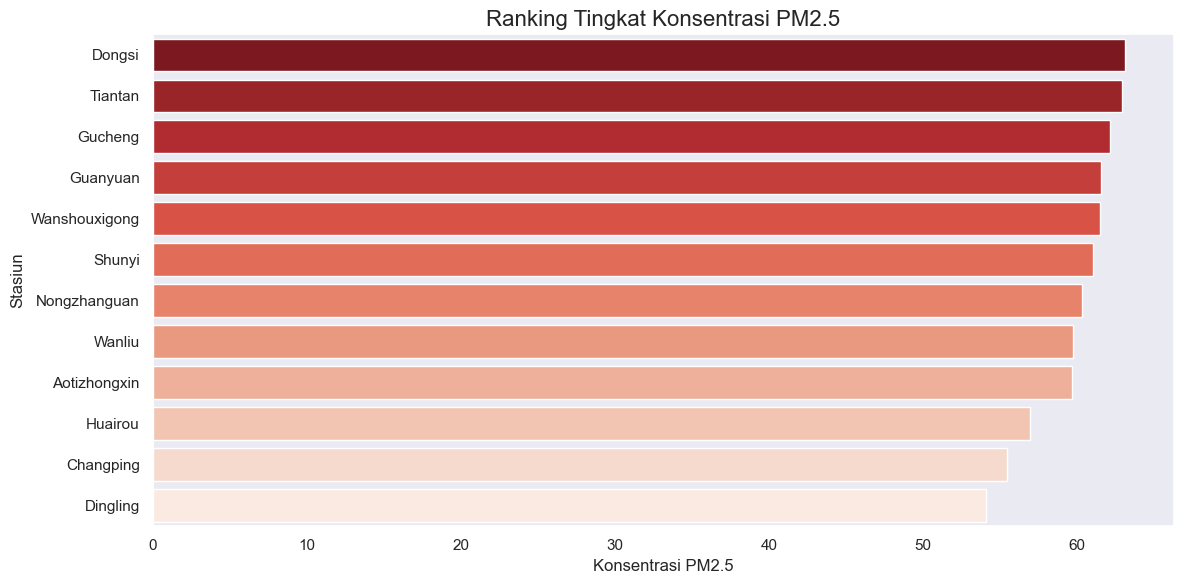

In [237]:
sns.set_theme(style="dark")
station_ranked = station_df.sort_values(by="PM2.5", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=station_ranked,
    x="PM2.5",
    y="station",
    hue="station",
    palette="Reds_r"
)

plt.title("Ranking Tingkat Konsentrasi PM2.5", fontsize=16)
plt.xlabel("Konsentrasi PM2.5", fontsize=12)
plt.ylabel("Stasiun", fontsize=12)
plt.tight_layout()
plt.show()


#### PM10

In [238]:

# Membuat peta dengan pusat di Beijing
mymap = folium.Map(location=[40.1002, 116.4074], zoom_start=10)


heat_data = [
    [row['latitude'], row['longitude'], row['PM10']]
    for index, row in station_df.iterrows()
]

HeatMap(heat_data, radius=30, blur=10, max_zoom=1).add_to(mymap)


# Menambahkan marker untuk setiap stasiun
for index, row in station_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(f"{row['station']} (CO: {row['CO']})", max_width=300),
        icon=folium.Icon(color='blue')
    ).add_to(mymap)


mymap.save('heatmapCO_debug.html')

mymap


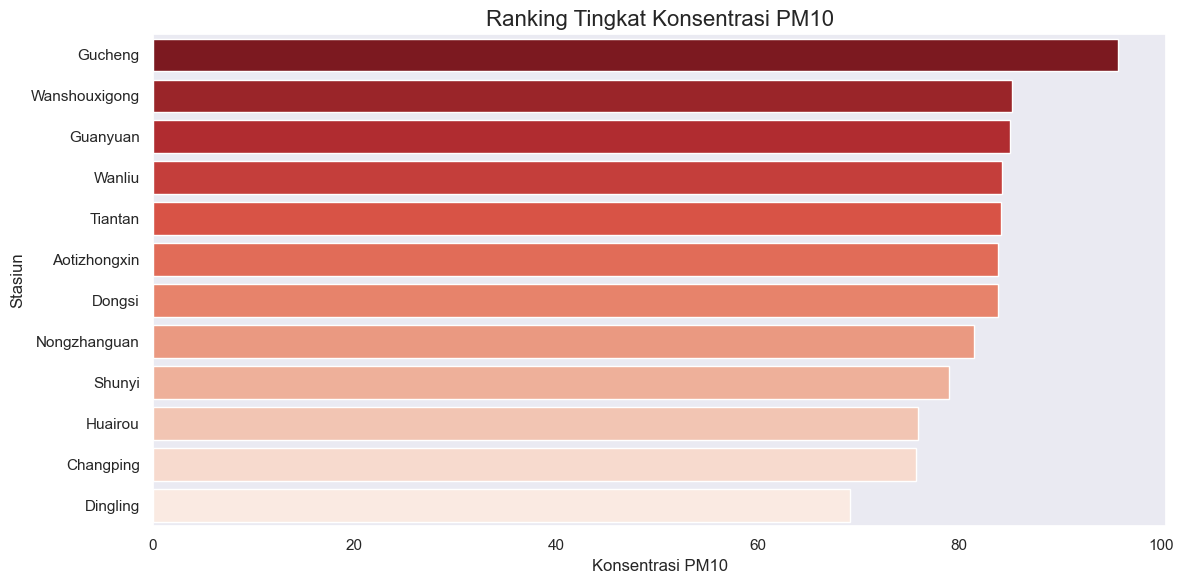

In [239]:
sns.set_theme(style="dark")
station_ranked = station_df.sort_values(by="PM10", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=station_ranked,
    x="PM10",
    y="station",
    hue="station",
    palette="Reds_r"
)

plt.title("Ranking Tingkat Konsentrasi PM10", fontsize=16)
plt.xlabel("Konsentrasi PM10", fontsize=12)
plt.ylabel("Stasiun", fontsize=12)
plt.tight_layout()
plt.show()


#### NO2

In [240]:

# Membuat peta dengan pusat di Beijing
mymap = folium.Map(location=[40.1002, 116.4074], zoom_start=10)


heat_data = [
    [row['latitude'], row['longitude'], row['NO2']]
    for index, row in station_df.iterrows()
]

HeatMap(heat_data, radius=30, blur=10, max_zoom=1).add_to(mymap)


# Menambahkan marker untuk setiap stasiun
for index, row in station_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(f"{row['station']} (CO: {row['CO']})", max_width=300),
        icon=folium.Icon(color='blue')
    ).add_to(mymap)


mymap.save('heatmapCO_debug.html')

mymap


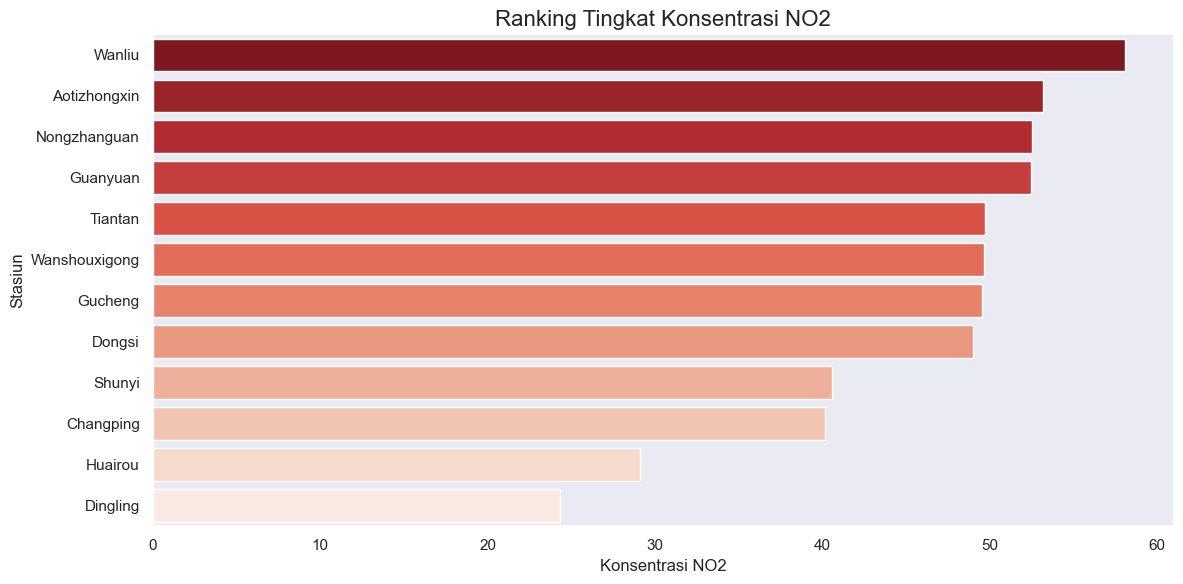

In [241]:
sns.set_theme(style="dark")
station_ranked = station_df.sort_values(by="NO2", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=station_ranked,
    x="NO2",
    y="station",
    hue="station",
    palette="Reds_r"
)

plt.title("Ranking Tingkat Konsentrasi NO2", fontsize=16)
plt.xlabel("Konsentrasi NO2", fontsize=12)
plt.ylabel("Stasiun", fontsize=12)
plt.tight_layout()
plt.show()


#### SO2

In [242]:

# Membuat peta dengan pusat di Beijing
mymap = folium.Map(location=[40.1002, 116.4074], zoom_start=10)


heat_data = [
    [row['latitude'], row['longitude'], row['SO2']]
    for index, row in station_df.iterrows()
]

HeatMap(heat_data, radius=30, blur=10, max_zoom=1).add_to(mymap)


# Menambahkan marker untuk setiap stasiun
for index, row in station_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(f"{row['station']} (CO: {row['CO']})", max_width=300),
        icon=folium.Icon(color='blue')
    ).add_to(mymap)


mymap.save('heatmapCO_debug.html')

mymap


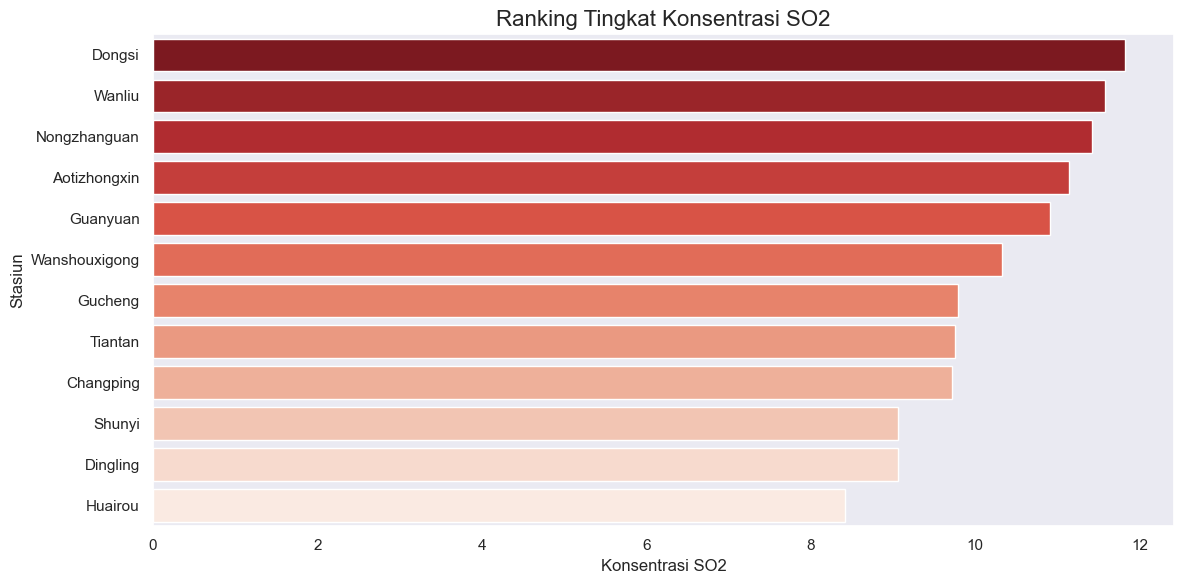

In [243]:
sns.set_theme(style="dark")
station_ranked = station_df.sort_values(by="SO2", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=station_ranked,
    x="SO2",
    y="station",
    hue="station",
    palette="Reds_r"
)

plt.title("Ranking Tingkat Konsentrasi SO2", fontsize=16)
plt.xlabel("Konsentrasi SO2", fontsize=12)
plt.ylabel("Stasiun", fontsize=12)
plt.tight_layout()
plt.show()


#### CO

In [244]:

# Membuat peta dengan pusat di Beijing
mymap = folium.Map(location=[40.1002, 116.4074], zoom_start=10)


heat_data = [
    [row['latitude'], row['longitude'], row['CO']]
    for index, row in station_df.iterrows()
]

HeatMap(heat_data, radius=30, blur=10, max_zoom=1).add_to(mymap)


# Menambahkan marker untuk setiap stasiun
for index, row in station_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(f"{row['station']} (CO: {row['CO']})", max_width=300),
        icon=folium.Icon(color='blue')
    ).add_to(mymap)




mymap


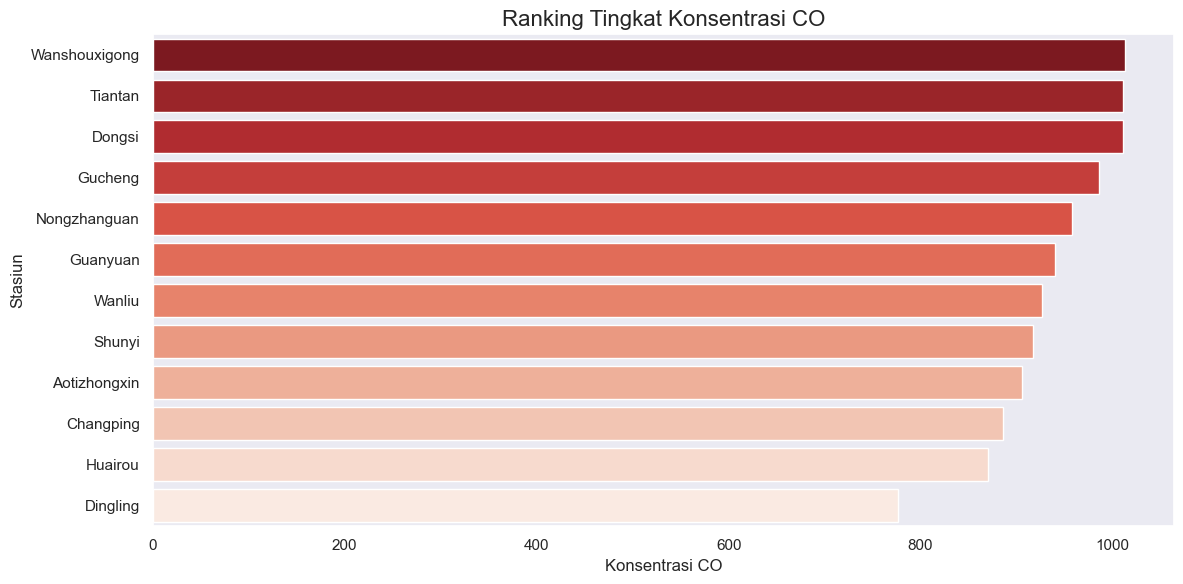

In [245]:
sns.set_theme(style="dark")
station_ranked = station_df.sort_values(by="CO", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=station_ranked,
    x="CO",
    y="station",
    hue="station",
    palette="Reds_r"
)

plt.title("Ranking Tingkat Konsentrasi CO", fontsize=16)
plt.xlabel("Konsentrasi CO", fontsize=12)
plt.ylabel("Stasiun", fontsize=12)
plt.tight_layout()
plt.show()


**Insight:**
- berdasarkan parameter PM2.5 distrik dongsi memilki tingkat konsentrasi paling tinggi
- berdasarkan paramater PM10 distrik gucheng memilki tingkat konsentrasi paling tinggi
- berdasarkan parameter NO2 distrik wanliu memilki tingkat konsentrasi paling tinggi
- berdasarkan paramater SO2 distrik dongsi memilki tingkat konsentrasi paling tinggi
- berdasarkan parameter CO distrik wanshouxigong memilki tingkat konsentrasi paling tinggi

### Pertanyaan 2: Apakah kualitas udara di beijing membaik atau memburuk selama periode 2013-2017?

#### PM2.5

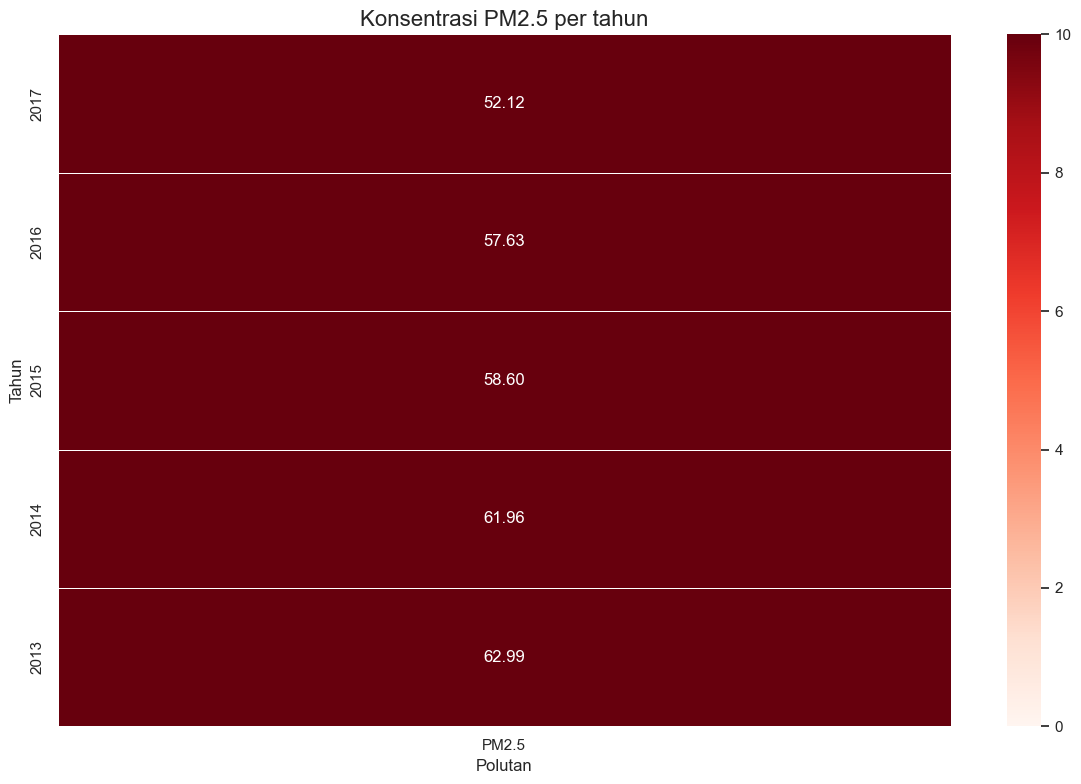

In [246]:
year_avg_melted = year_avg.melt(id_vars='year', 
                                var_name='Polutan', 
                                value_name='Rata - rata konsentrasi')
# Filter data untuk PM2.5
pm25_data = year_avg_melted[year_avg_melted['Polutan'] == 'PM2.5']

# menggunakan batas maksimal berdasarkan dictionary yang sebelumnya dibuat
pm25_limit = who_limits['PM2.5']


plt.figure(figsize=(12, 8))
heatmap_data = pm25_data.pivot(index="year", columns="Polutan", values="Rata - rata konsentrasi")


sns.heatmap(heatmap_data, annot=True, cmap="Reds", fmt=".2f", linewidths=.5, vmin=0, vmax=pm25_limit)


plt.title(f'Konsentrasi PM2.5 per tahun', fontsize=16)
plt.xlabel('Polutan', fontsize=12)
plt.ylabel('Tahun', fontsize=12)


plt.gca().invert_yaxis()


plt.tight_layout()
plt.show()


#### PM10

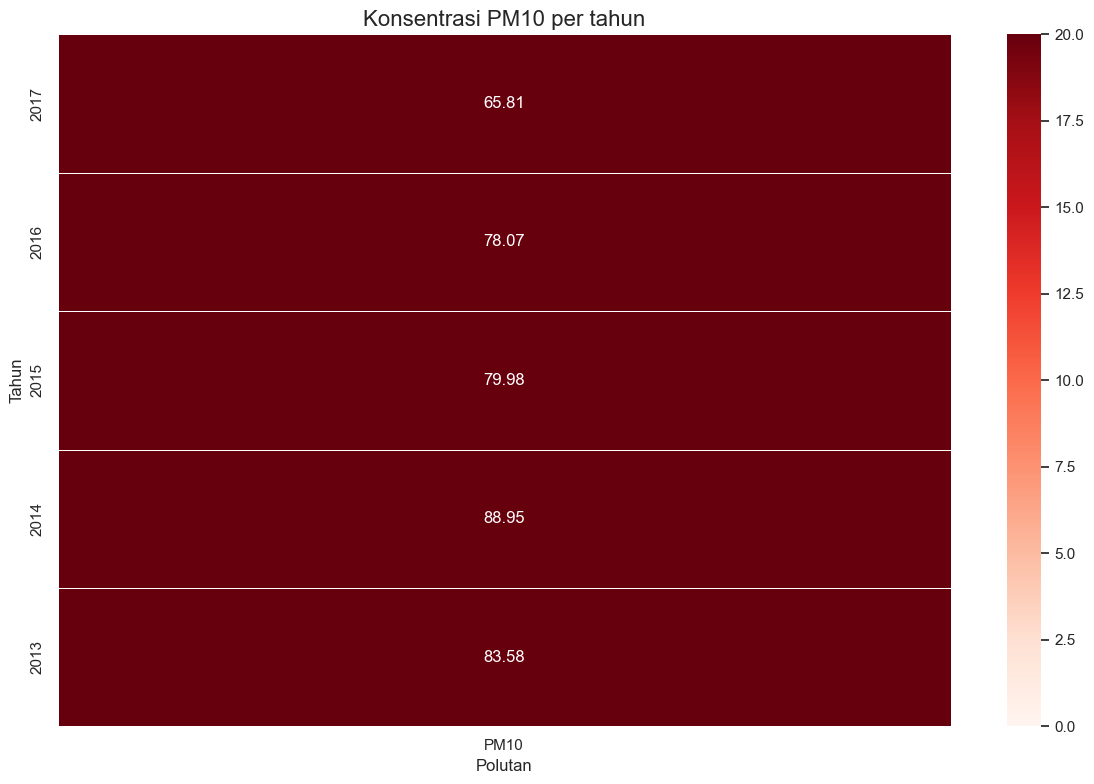

In [247]:
year_avg_melted = year_avg.melt(id_vars='year', 
                                var_name='Polutan', 
                                value_name='Rata - rata konsentrasi')
# Filter data untuk PM2.5
pm10_data = year_avg_melted[year_avg_melted['Polutan'] == 'PM10']

# menggunakan batas maksimal berdasarkan dictionary yang sebelumnya dibuat
pm10_limit = who_limits['PM10']


plt.figure(figsize=(12, 8))
heatmap_data = pm10_data.pivot(index="year", columns="Polutan", values="Rata - rata konsentrasi")


sns.heatmap(heatmap_data, annot=True, cmap="Reds", fmt=".2f", linewidths=.5, vmin=0, vmax=pm10_limit)


plt.title(f'Konsentrasi PM10 per tahun', fontsize=16)
plt.xlabel('Polutan', fontsize=12)
plt.ylabel('Tahun', fontsize=12)


plt.gca().invert_yaxis()


plt.tight_layout()
plt.show()


#### NO2

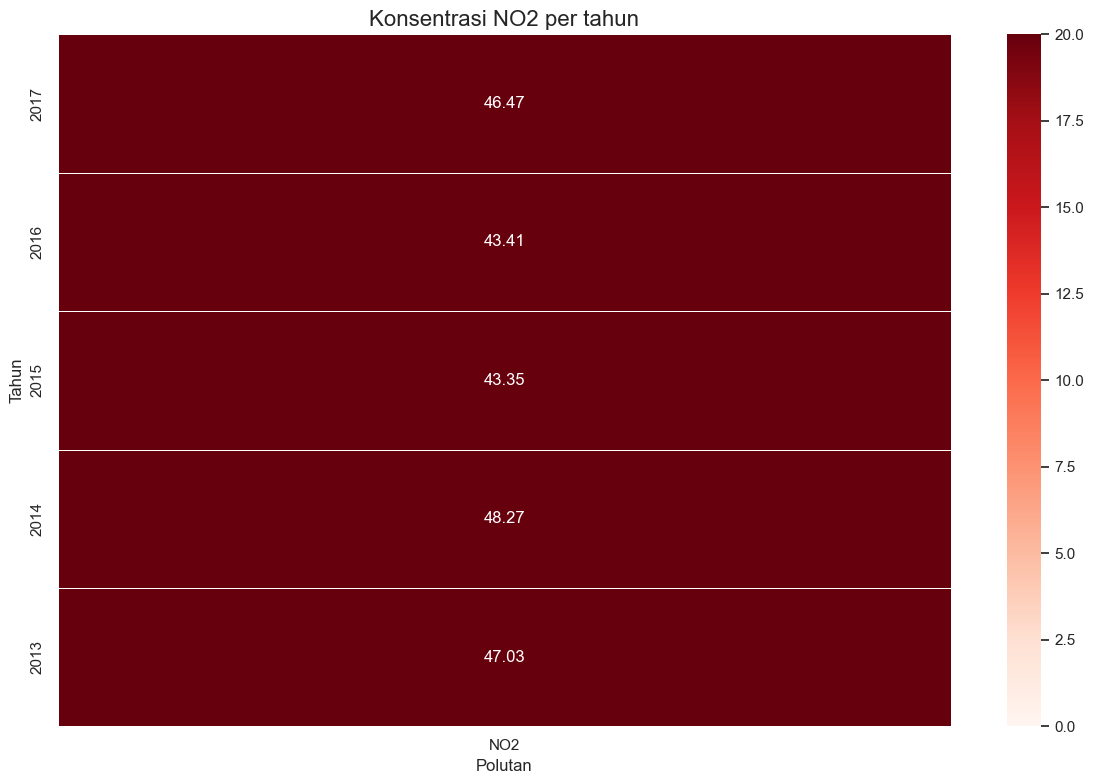

In [248]:
year_avg_melted = year_avg.melt(id_vars='year', 
                                var_name='Polutan', 
                                value_name='Rata - rata konsentrasi')
# Filter data untuk PM2.5
no2_data = year_avg_melted[year_avg_melted['Polutan'] == 'NO2']

# menggunakan batas maksimal berdasarkan dictionary yang sebelumnya dibuat
no2_limit = who_limits['PM10']


plt.figure(figsize=(12, 8))
heatmap_data = no2_data.pivot(index="year", columns="Polutan", values="Rata - rata konsentrasi")


sns.heatmap(heatmap_data, annot=True, cmap="Reds", fmt=".2f", linewidths=.5, vmin=0, vmax=no2_limit)


plt.title(f'Konsentrasi NO2 per tahun', fontsize=16)
plt.xlabel('Polutan', fontsize=12)
plt.ylabel('Tahun', fontsize=12)


plt.gca().invert_yaxis()


plt.tight_layout()
plt.show()


#### SO2

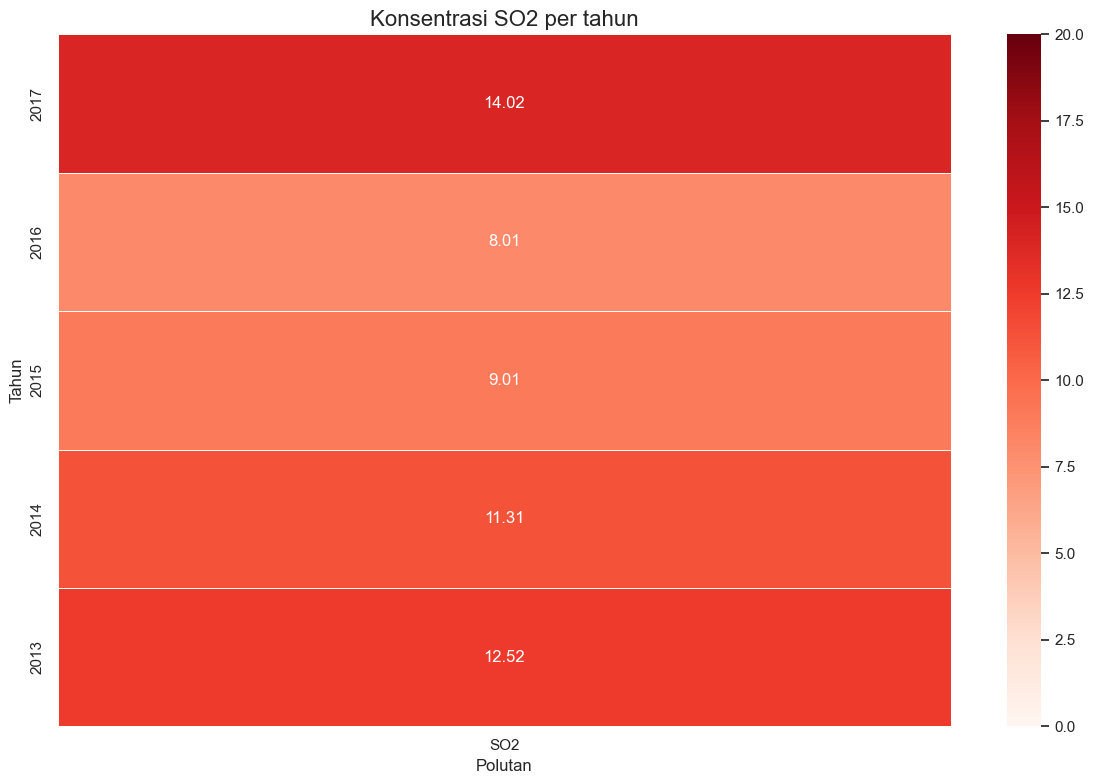

In [249]:
year_avg_melted = year_avg.melt(id_vars='year', 
                                var_name='Polutan', 
                                value_name='Rata - rata konsentrasi')
# Filter data untuk PM2.5
so2_data = year_avg_melted[year_avg_melted['Polutan'] == 'SO2']

# menggunakan batas maksimal berdasarkan dictionary yang sebelumnya dibuat
so2_limit = who_limits['SO2']


plt.figure(figsize=(12, 8))
heatmap_data = so2_data.pivot(index="year", columns="Polutan", values="Rata - rata konsentrasi")


sns.heatmap(heatmap_data, annot=True, cmap="Reds", fmt=".2f", linewidths=.5, vmin=0, vmax=so2_limit)


plt.title(f'Konsentrasi SO2 per tahun', fontsize=16)
plt.xlabel('Polutan', fontsize=12)
plt.ylabel('Tahun', fontsize=12)


plt.gca().invert_yaxis()


plt.tight_layout()
plt.show()


#### CO

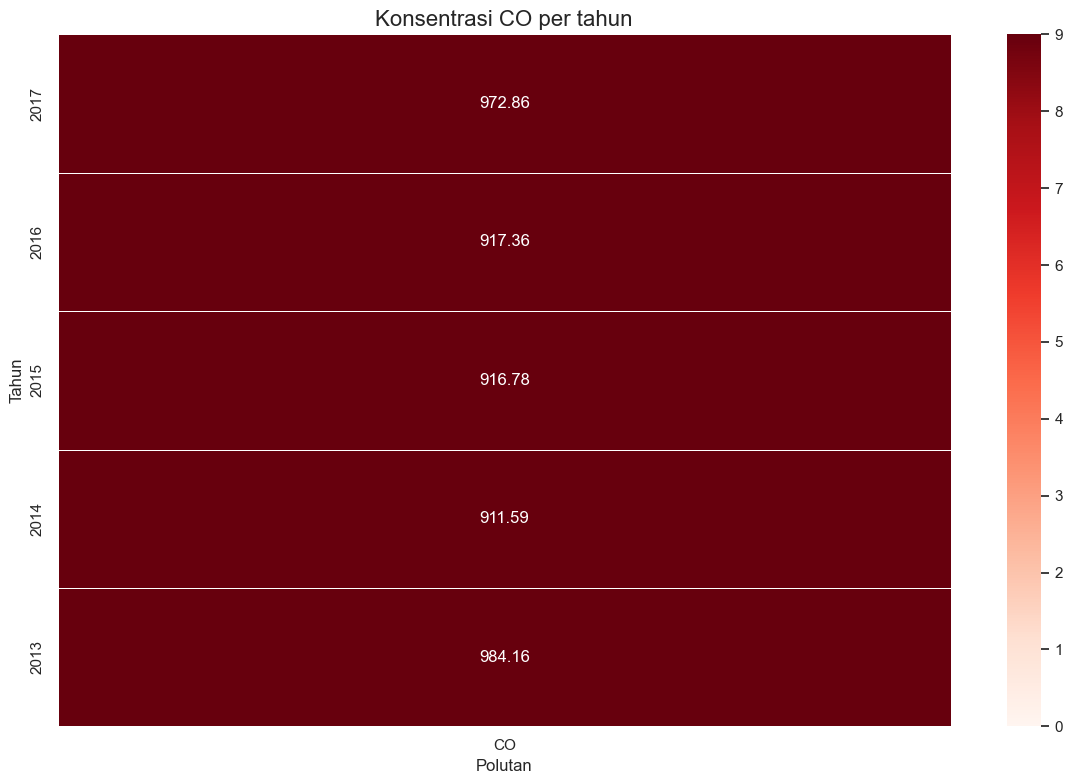

In [250]:
year_avg_melted = year_avg.melt(id_vars='year', 
                                var_name='Polutan', 
                                value_name='Rata - rata konsentrasi')
# Filter data untuk PM2.5
co_data = year_avg_melted[year_avg_melted['Polutan'] == 'CO']

# menggunakan batas maksimal berdasarkan dictionary yang sebelumnya dibuat
co_limit = who_limits['CO']


plt.figure(figsize=(12, 8))
heatmap_data = co_data.pivot(index="year", columns="Polutan", values="Rata - rata konsentrasi")


sns.heatmap(heatmap_data, annot=True, cmap="Reds", fmt=".2f", linewidths=.5, vmin=0, vmax=co_limit)


plt.title(f'Konsentrasi CO per tahun', fontsize=16)
plt.xlabel('Polutan', fontsize=12)
plt.ylabel('Tahun', fontsize=12)


plt.gca().invert_yaxis()


plt.tight_layout()
plt.show()


**Insight:**
- secara keseluruhan kualitas udara di beijing berangsur membaik seperti menurun nya tingkat konsentrasi PM2.5, PM.10, NO2, dan CO
- namun hal tersebut masih jauh di ambang batas tingkat aman konsentrasi polutan udara yang di tetapkan WHO

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan analisis data kualitas udara di Beijing pada periode 2013-2017, ditemukan bahwa:
Konsentrasi Tertinggi Berdasarkan Parameter Polutan:
Distrik Dongsi menunjukkan tingkat konsentrasi tertinggi untuk parameter PM2.5 dan SO2.
Distrik Gucheng memiliki konsentrasi tertinggi untuk parameter PM10.
Distrik Wanliu mencatat konsentrasi tertinggi untuk parameter NO2.
Distrik Wanshouxigong menunjukkan konsentrasi tertinggi untuk parameter CO.
Hal ini menunjukkan bahwa kualitas udara bervariasi secara spasial di setiap distrik, dengan beberapa distrik mengalami tekanan polutan tertentu lebih tinggi dibanding lainnya.

- Perbaikan Kualitas Udara:
Secara keseluruhan, terdapat tren penurunan konsentrasi PM2.5, PM10, NO2, dan CO selama lima tahun tersebut, mengindikasikan upaya perbaikan kualitas udara yang membuahkan hasil.
Namun, tingkat konsentrasi polutan masih berada di atas ambang batas aman yang direkomendasikan oleh WHO, sehingga potensi risiko kesehatan tetap tinggi.